In [110]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns
import numpy as np
from pprint import pprint

In [7]:
SFB_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
SFB_data = pd.read_csv(SFB_csv)
print(SFB_data.columns)
print("------------------------------")
print(SFB_data.shape)
print("------------------------------")
print(SFB_data.dtypes)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
------------------------------
(2217, 10)
------------------------------
State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6


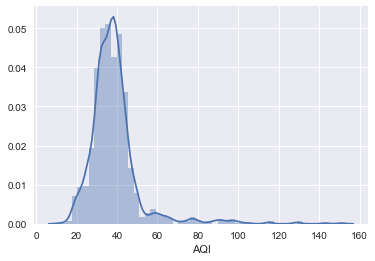

In [9]:
time_series_17 = SFB_data.Date
AQI = SFB_data.AQI
Category = SFB_data.Category
Ozone_param = SFB_data[SFB_data["Defining Parameter"] == 'Ozone']
Ozone_param_y = Ozone_param.AQI
Ozone_param_x = Ozone_param.Date
print(sns.distplot(Ozone_param_y))
# plt.bar(Ozone_param_x, Ozone_param_y) #AQI for Ozone measurement over 2017; need to bin dates into months
                        #and average values where the date is the same for a county's measurement.
SFB_data.head()

[Text(0.5,0,'Histograms of AQI for All Pollutants, 2017')]

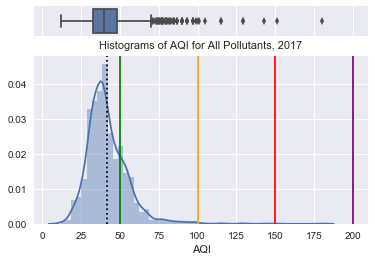

In [134]:
#Hist for all AQIs

Avg_AQI = SFB_data.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(SFB_data.AQI, ax=ax_box)
sns.distplot(SFB_data.AQI, ax=ax_hist)
plt.axvline(Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2017')

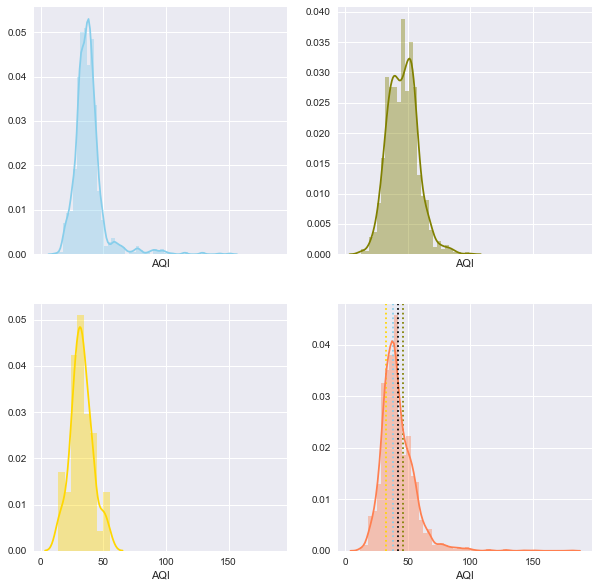

In [139]:
# source : https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

#Mean AQIs per pollutants

m_Oz=SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m_Pm25=SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m_NO2=SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI.mean()

# sns.distplot(SFB_data.AQI) #Hist for all AQIs

f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI , color="skyblue", ax=axes[0,0],label = "Ozone")
plt.axvline(m_Oz, linestyle="dotted",color='skyblue')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI , color="olive", ax=axes[0, 1],label = "PM2.5")
plt.axvline(m_Pm25, linestyle="dotted",color='olive')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI , color="gold", ax=axes[1, 0],label = "NO2")
plt.axvline(m_NO2, linestyle="dotted",color='gold')

sns.distplot( SFB_data.AQI , color="coral", ax=axes[1, 1],label = "All")
plt.axvline(Avg_AQI, linestyle="dotted",color='black')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# sns.plt.legend()

# plt.xlabel("Histogram of Pollutants' AQI")

In [10]:
#Binning dates into months

SFB_data['Months']=SFB_data.Date.apply(lambda x: str(x)[:1]) #isolate the month
# SFB_data['Months']= SFB_data['Months'].replace({'1': "January",'2': "February",
#                                       '3': "March",'4': "April",
#                                       '5': "May",'6': "June",
#                                       '7': "July",'8': "August",
#                                        '9': "September"})
SFB_data['Months'].unique()
SFB_data['Months'].head
SFB_data.head()



# SFB_data['Months'].max() #Missing data for Oct-December!!
# for index, row in SFB_data.iterrows():
#     month, day, year = len(row['Date'].split("/"))
#     print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/37200142/mm-dd-yyyy-date-to-variable-conversion-m-d-and-y

# month, day, year = time_series_17.split('/')
# print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/36108377/how-to-use-the-split-function-on-every-row-in-a-dataframe-in-python

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Months
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6,1
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6,1
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6,1
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6,1
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6,1


Months
1    43.541219
2    38.190476
3    37.577061
4    41.896296
5    40.000000
6    39.951852
7    42.845878
8    50.949821
9    47.166667
Name: AQI, dtype: float64


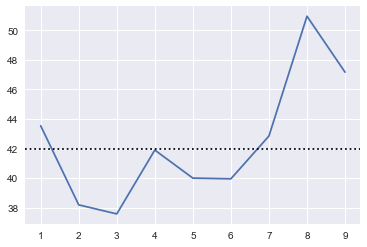

In [142]:
SFB_data_months_m = SFB_data.groupby("Months").mean() 
AQI_m_permonths = SFB_data_months_m.AQI
AQI_m_permonths #Trendline
SFB_data.Category.unique()
print(AQI_m_permonths)

#Avg. AQI per month during 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_permonths)
plt.axhline(Avg_AQI, linestyle="dotted",color='black')
plt.show()

Ozone    1157
PM2.5    1011
NO2        46
SO2         2
PM10        1
Name: Defining Parameter, dtype: int64


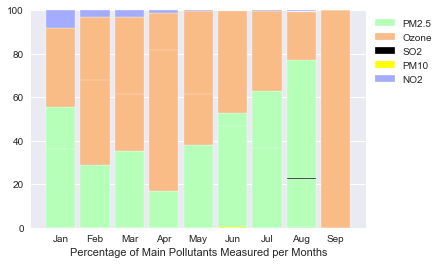

In [65]:
SFB_data_params = SFB_data.groupby('Defining Parameter')

print(SFB_data['Defining Parameter'].value_counts())

    #Gather the count of the measured parameters per month (for param_count)
Jan = SFB_data[SFB_data["Months"] == '1']
# print(Jan['Defining Parameter'].value_counts())
Feb = SFB_data[SFB_data["Months"] == '2']
# print(Feb['Defining Parameter'].value_counts())
Mar = SFB_data[SFB_data["Months"] == '3']
# print(Mar['Defining Parameter'].value_counts())
Apr = SFB_data[SFB_data["Months"] == '4']
# print(Apr['Defining Parameter'].value_counts())
May = SFB_data[SFB_data["Months"] == '5']
# print(May['Defining Parameter'].value_counts())
Jun = SFB_data[SFB_data["Months"] == '6']
# print(Jun['Defining Parameter'].value_counts())
Jul = SFB_data[SFB_data["Months"] == '7']
# print(Jul['Defining Parameter'].value_counts())
Aug = SFB_data[SFB_data["Months"] == '8']
# print(Aug['Defining Parameter'].value_counts())
Sep = SFB_data[SFB_data["Months"] == '9']
# print(Sep['Defining Parameter'].value_counts())

    #Percent Stacked Barplot of Pollutants over the months
    # https://python-graph-gallery.com/13-percent-stacked-barplot/
r = [0,1,2,3,4,5,6,7,8]
param_count = {'PM2.5':[155,73,98,46,106,143,176,214,0],
               'Ozone': [101,171,172,221,172,126,102,62,30],
               'NO2': [23,8,9,3,1,0,1,1,0],
               'SO2': [0,0,0,0,0,0,0,1,0],
               'PM10':[0,0,0,0,0,1,0,0,0]
              }
df_par = pd.DataFrame(param_count)

totals = [i+j+k+l+m for i,j,k,l,m in zip(df_par['PM2.5'], df_par['Ozone'], df_par['NO2'], df_par['SO2'], df_par['PM10'])]
PM25 = [i / j * 100 for i,j in zip(df_par['PM2.5'], totals)]
Ozone = [i / j * 100 for i,j in zip(df_par['Ozone'], totals)]
NO2 = [i / j * 100 for i,j in zip(df_par['NO2'], totals)]
SO2 = [i / j * 100 for i,j in zip(df_par['SO2'], totals)]
PM10 = [i / j * 100 for i,j in zip(df_par['PM10'], totals)]

barWidth = 0.85
names = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep')
plt.bar(r, PM25, color='#b5ffb9', edgecolor='white', width=barWidth,label ="PM2.5" ) #green
plt.bar(r, Ozone, bottom=PM25, color='#f9bc86', edgecolor='white', width=barWidth,label ="Ozone") #orange
plt.bar(r, SO2, bottom=Ozone, color='#000000', edgecolor='white', width=barWidth,label ="SO2") #black
plt.bar(r, PM10, bottom=SO2, color='#FFFF00', edgecolor='white', width=barWidth,label ="PM10") #yellow
plt.bar(r, NO2, bottom=[i+j+k+l for i,j,k,l in zip(PM25, Ozone,SO2,PM10)], color='#a3acff', edgecolor='white', width=barWidth,label ="NO2") # blue

plt.xticks(r, names)
plt.xlabel("Percentage of Main Pollutants Measured per Months")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

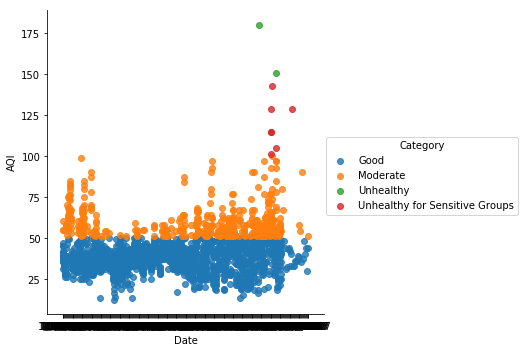

In [48]:
#AQI Distribution for each measurement date
sns.lmplot( x="Date", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
Months                        int32
dtype: object


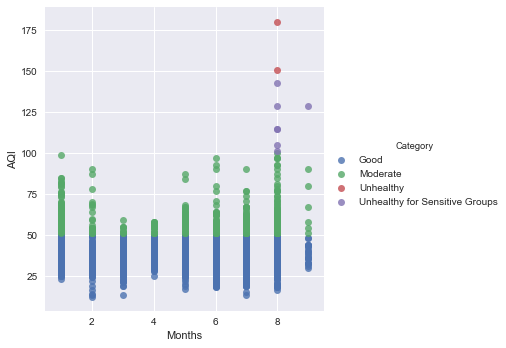

In [116]:
SFB_data.Months=SFB_data.Months.astype(int)
print(SFB_data.dtypes)

#AQI Distribution by months
# colors = {'Good':'#FFD700', 'Moderate':'#87CEFA', 'Unhealthy':'#F08080','Unhealthy':'#F08080'}
sns.lmplot( x="Months", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)
# plt.legend(loc='lower right')

# labels = ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups']

In [4]:
#Limit: 500 requests per hours
            #Select randomly up to 50 zip codes from the AirNow API
                #Select 7 days (a week) during October 2017 (height of the Sonoma fires)
                    #Oct. 9th - Oct. 15th.

Zip_csv = "Raw_Data/bayarea_zipcodes.csv"
Zip_data = pd.read_csv(Zip_csv)
Zip_data = Zip_data.ZIP
random_zip = []
random_zip = Zip_data.sample(70)
random_zip=random_zip.reset_index(drop=True)

# date_range = []

# query_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode={XXX}&date=2017-10-{XXX}T00-0000&distance=25&API_KEY=42C6925A-9E38-4682-8706-77E17F01F983"

# counter = 0
# for index, row in weather_df.iterrows():
    


0     94538
1     94595
2     94539
3     94566
4     94606
5     94535
6     94607
7     94089
8     94549
9     94703
10    94930
11    94618
12    94706
13    94080
14    94025
15    94038
16    94127
17    94102
18    94132
19    94301
20    94933
21    95620
22    94585
23    94022
24    94103
25    94946
26    94520
27    94521
28    94949
29    94514
      ...  
40    94801
41    94571
42    94531
43    94123
44    94128
45    94512
46    94707
47    94107
48    94114
49    94572
50    94028
51    94592
52    94118
53    94965
54    94528
55    94108
56    94558
57    94964
58    94403
59    94590
60    94002
61    94401
62    94598
63    94564
64    94086
65    94117
66    94586
67    94027
68    94710
69    94705
Name: ZIP, Length: 70, dtype: int64

In [12]:
# url1 ="https://aqs.epa.gov/api/rawData?user=hp.nunes@protonmail.com&pw=cobalthawk52&format=AQCSV&pc=AQI_POLLUTANTS&bdate=20170101&edate=20171231&state=06&county=001&county=013&county=041&county=055&county=075&county=081&county=085&county=095&county=097"
# request1 = requests.get(url1).json()
# print(request1)
# pprint(request_json)

#Variables of interest:
    #AQI except filter where AQI = -1
    #Category
    #Lat, Long
    #StateCode
    #ReportingArea
    #DateForecast & DateIssue
    #ParameterName
        #link to documentation: https://docs.airnowapi.org/forecastsbylatlon/docs

[{'AQI': 50,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-09 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 46,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-10 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-11 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-12 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude':

In [20]:
#Query by zip code

url_z = "http://www.airnowapi.org/aq/observation/zipCode/current/?format=application/json&zipCode=94133&distance=25&API_KEY=E2D50D6C-9124-4349-8C9A-96C411439052"
print(requests.get(url_z))

<Response [200]>


In [19]:
request_z = requests.get(url_z)
request_z_json=request_z.json()
pprint(request_z_json)

[{'AQI': 28,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'O3',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 53,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
